In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
sns.set()

C:\Users\Raad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Raad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Raad\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Raad\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data= pd.read_csv("listings.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,90676,Home in Columbus · ★4.82 · 3 bedrooms · 3 beds...,483306,Audra & Lacey,NaN,Near North/University,39.98366,-83.00252,Entire home/apt,132.0,1,726,2023-12-17,4.88,3,0,101,2022-2475
1,543140,Home in Columbus · ★4.70 · 1 bedroom · 1 bed ·...,2350409,Edward,NaN,Near North/University,40.01114,-83.01005,Private room,29.0,7,133,2023-12-09,0.96,3,327,10,2019-1344
2,591101,Loft in Columbus · ★4.92 · 1 bedroom · 1 bed ·...,2889677,Gail,NaN,Near East,39.96041,-82.98005,Private room,110.0,2,296,2023-11-12,2.14,1,0,19,2019-1230
3,923248,Hostel in Columbus · ★4.74 · 1 bedroom · 5 bed...,4965048,Mathew,NaN,Near North/University,40.01259,-83.00164,Shared room,30.0,1,348,2023-11-23,2.64,8,349,54,2019-1314
4,927867,Hostel in Columbus · ★4.72 · 1 bedroom · 1 bed...,4965048,Mathew,NaN,Near North/University,40.01259,-83.00164,Private room,73.0,1,76,2023-10-28,0.61,8,336,9,2019-1314


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2668 non-null   int64  
 1   name                            2668 non-null   object 
 2   host_id                         2668 non-null   int64  
 3   host_name                       2668 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   2668 non-null   object 
 6   latitude                        2668 non-null   float64
 7   longitude                       2668 non-null   float64
 8   room_type                       2668 non-null   object 
 9   price                           2579 non-null   float64
 10  minimum_nights                  2668 non-null   int64  
 11  number_of_reviews               2668 non-null   int64  
 12  last_review                     22

In [4]:
#removing duplicates
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [5]:
data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               2668
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                               89
minimum_nights                       0
number_of_reviews                    0
last_review                        381
reviews_per_month                  381
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            368
dtype: int64

In [6]:
#dropping unnecessary columns
data.drop(['id', 'name', 'host_name','last_review', 'neighbourhood_group'], axis=1, inplace=True)

In [7]:
#filling empty reviews with 0 value
data['reviews_per_month'].fillna(0, inplace=True)

In [8]:
#filling missing (price) values with mean price.
mean_price = data['price'].mean()
data['price'].fillna(mean_price, inplace=True)

In [9]:
data.isnull().sum()

host_id                             0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           368
dtype: int64

In [10]:
data.head()

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,483306,Near North/University,39.98366,-83.00252,Entire home/apt,132.0,1,726,4.88,3,0,101,2022-2475
1,2350409,Near North/University,40.01114,-83.01005,Private room,29.0,7,133,0.96,3,327,10,2019-1344
2,2889677,Near East,39.96041,-82.98005,Private room,110.0,2,296,2.14,1,0,19,2019-1230
3,4965048,Near North/University,40.01259,-83.00164,Shared room,30.0,1,348,2.64,8,349,54,2019-1314
4,4965048,Near North/University,40.01259,-83.00164,Private room,73.0,1,76,0.61,8,336,9,2019-1314


In [11]:
data.iloc[:,3:].describe()

,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2668.000000,2668.000000,2668.00000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,-82.989815,142.770066,7.45952,50.091454,1.987792,13.258621,194.419790,17.464768
std,0.040977,122.352286,13.12943,85.014416,1.982144,18.523403,137.967943,22.443761
min,-83.173610,9.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-83.007393,77.000000,1.00000,3.000000,0.380000,2.000000,61.000000,1.000000
50%,-82.997043,114.000000,2.00000,16.000000,1.480000,5.000000,180.000000,9.000000
75%,-82.973175,160.000000,3.00000,57.000000,2.980000,19.000000,340.250000,26.000000
max,-82.782440,1673.000000,300.00000,833.000000,15.400000,89.000000,365.000000,298.000000


In [12]:
top_host=data.host_id.value_counts().head(10)
top_host

host_id
158439641    89
453019578    51
235497311    44
194281106    40
263502162    33
52174539     33
447235921    31
63469270     29
286980818    28
115836608    28
Name: count, dtype: int64

**checking what hosts (IDs) have the most listings on Airbnb platform in Columbus.**


In [13]:
data.neighbourhood.unique()

array(['Near North/University', 'Near East', 'Near South', 'Clintonville',
       'West Olentangy', 'South Linden', 'Rocky Fork-Blacklick',
       'Eastmoor/Walnut Ridge', 'Hayden Run', 'Northland', 'Downtown',
       'Northwest', 'Far Northwest', 'North Linden', 'Far East',
       'West Scioto', 'Far West', 'Far South', 'Far North', 'Northeast',
       'Hilltop', 'Eastland/Brice', 'Greenlawn/Frank Road', 'Franklinton',
       'Westland', 'Southeast'], dtype=object)

**Checking what neighbourhoods do we have in Columbus city.**

In [14]:
data.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

**Checking different rent/room types we have in our listing.**

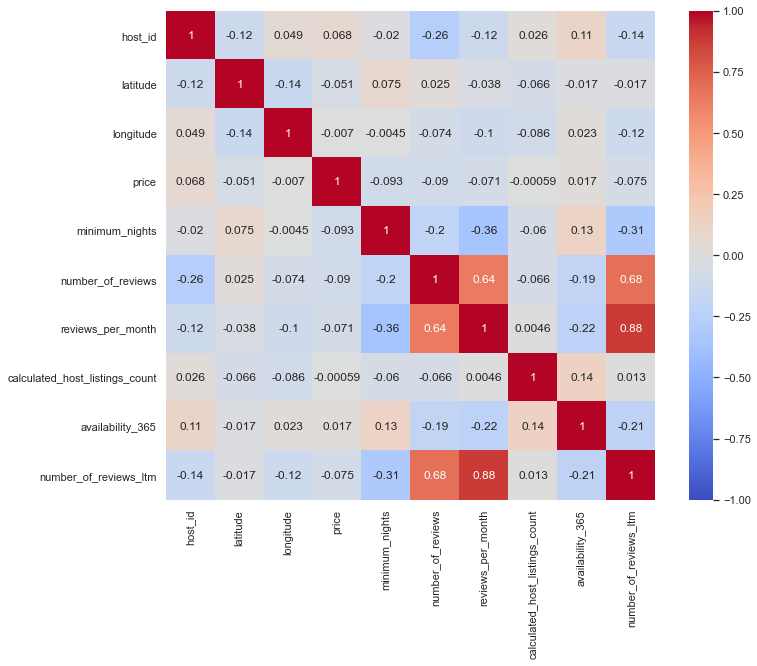

In [15]:
#checking correlation between varibales by visualizing the heatmap.
data['price'] = pd.to_numeric(data['price'], errors='coerce')

numeric_data = data.select_dtypes(include=['number'])

corrmat = numeric_data.corr()

plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, cmap='coolwarm', vmin=-1, vmax=1, square=True, annot=True)
plt.show()

**By plotting the heatmap, we can notice the correlation and percentage of it between all variables.**

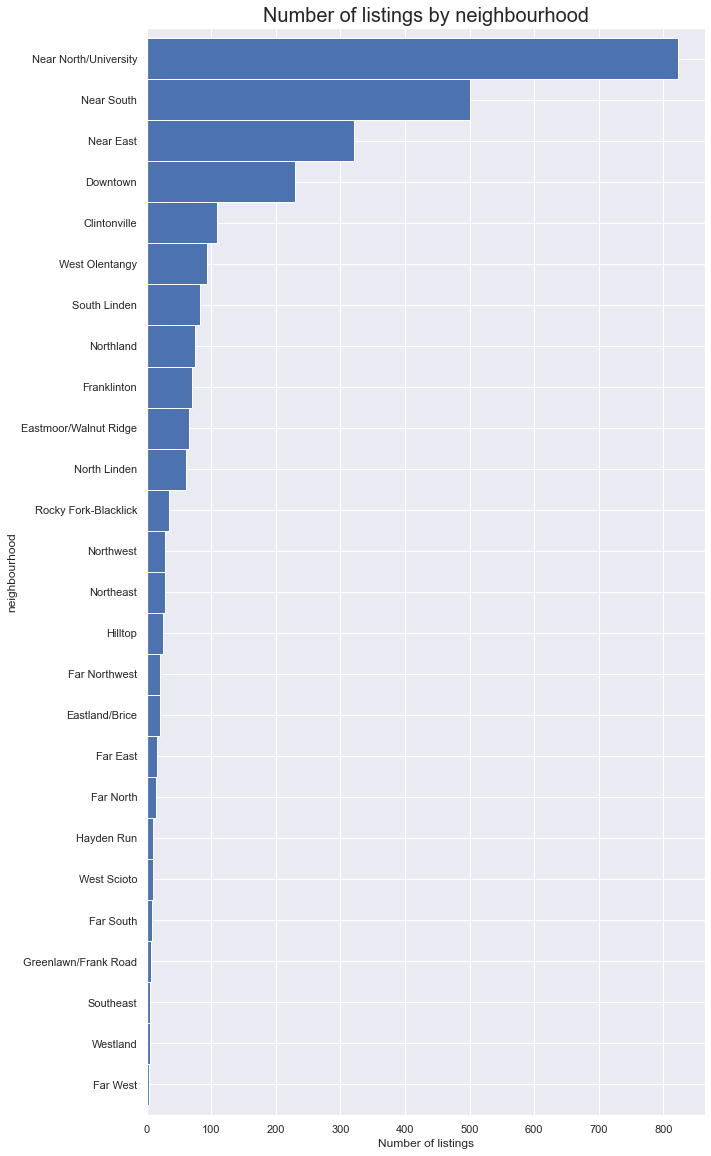

In [16]:
#Plotting counts for all Neighbourhoods.
feq=data['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 20), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

**From this graph we can notice neighbourhoods with more home/room listing.**

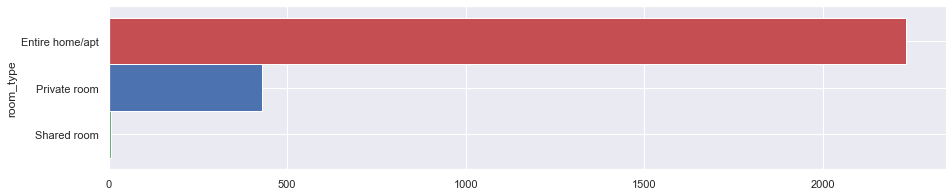

In [17]:
##Plotting counts for different room types.
freq = data['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()

**Here we can see difference between different room types counts/listings, and we can notice that Entire home/apt is the most listed type.**

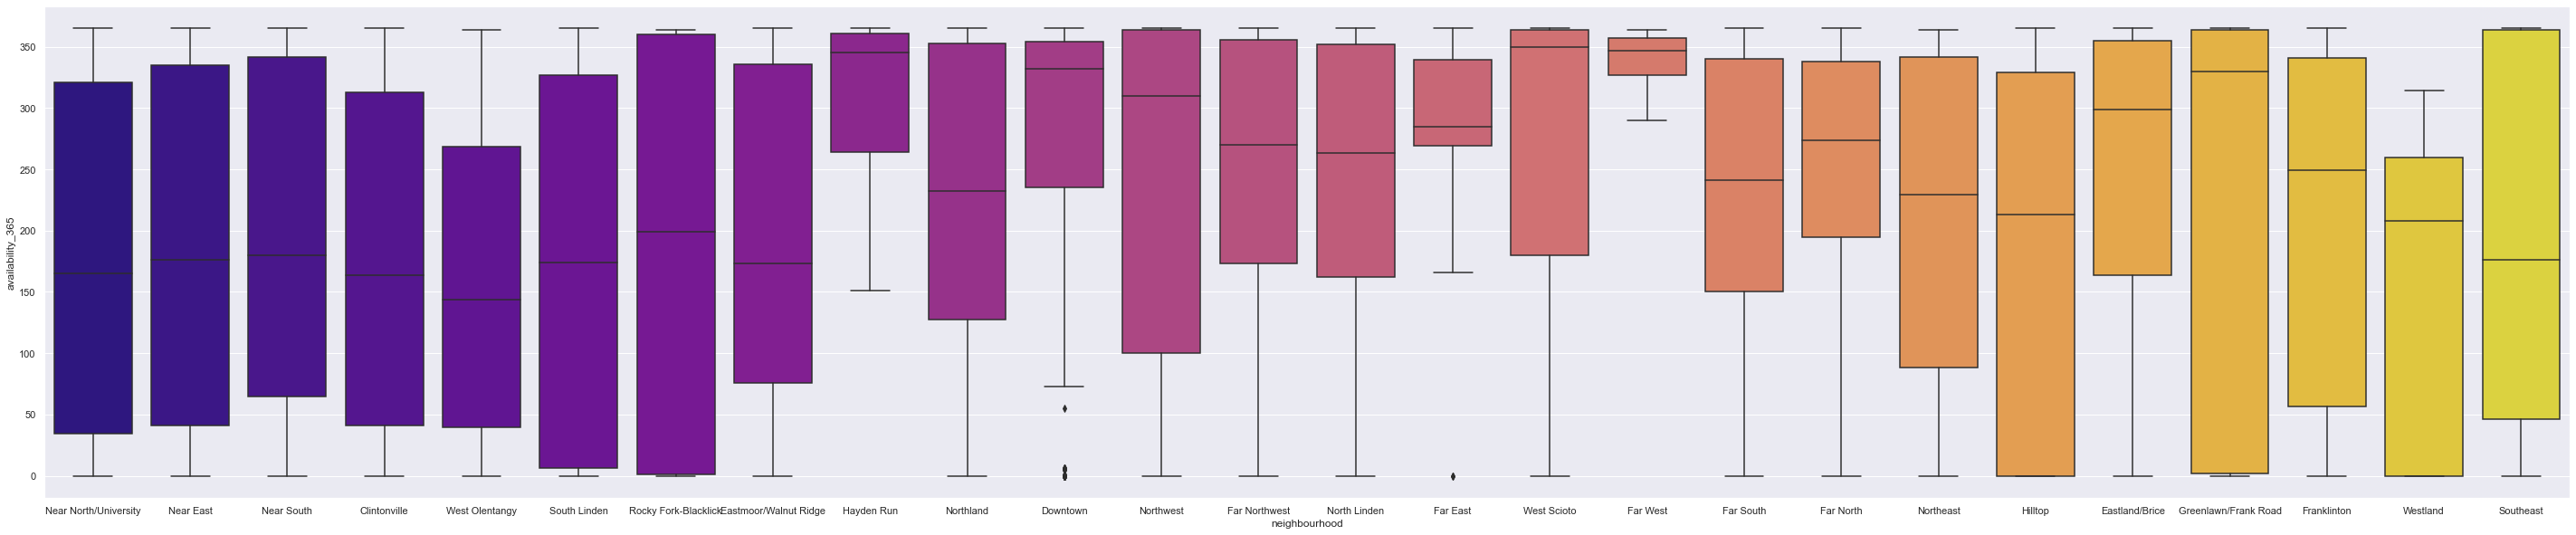

In [18]:
#Relation between Neighbourhoods and rooms availability
plt.figure(figsize=(50,10))
ax = sns.boxplot(data=data, x='neighbourhood',y='availability_365',palette='plasma')

**from this boxplt graph we can see Max/min, mean rents for each neighbourhood.**

C:\Users\Raad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


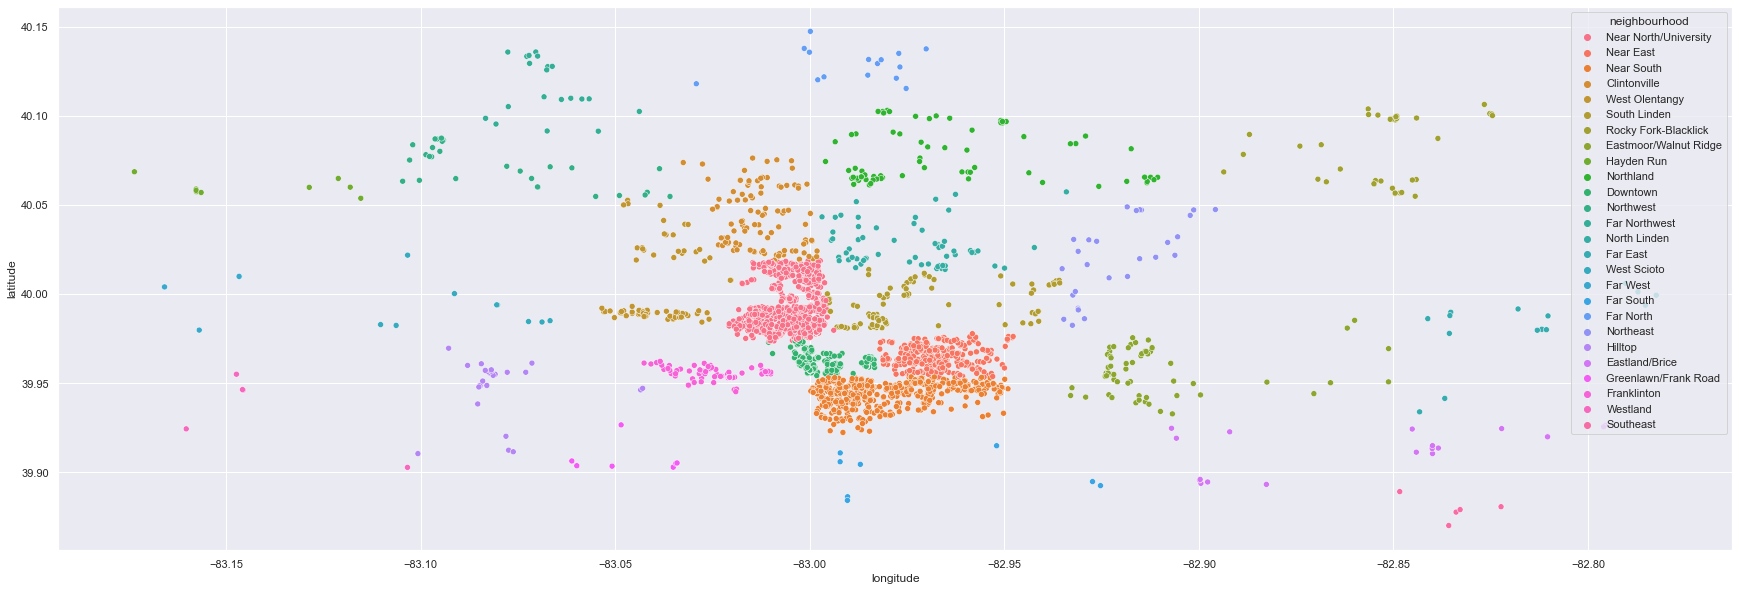

In [19]:
#Map of Neighbourhoods.
plt.figure(figsize=(30,10))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood)
plt.ioff()

**This map can help customers to choose based on location of Home/room and how far it's from city center or where is that neighbourhood located on the map based on longitude and latitude.**

C:\Users\Raad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


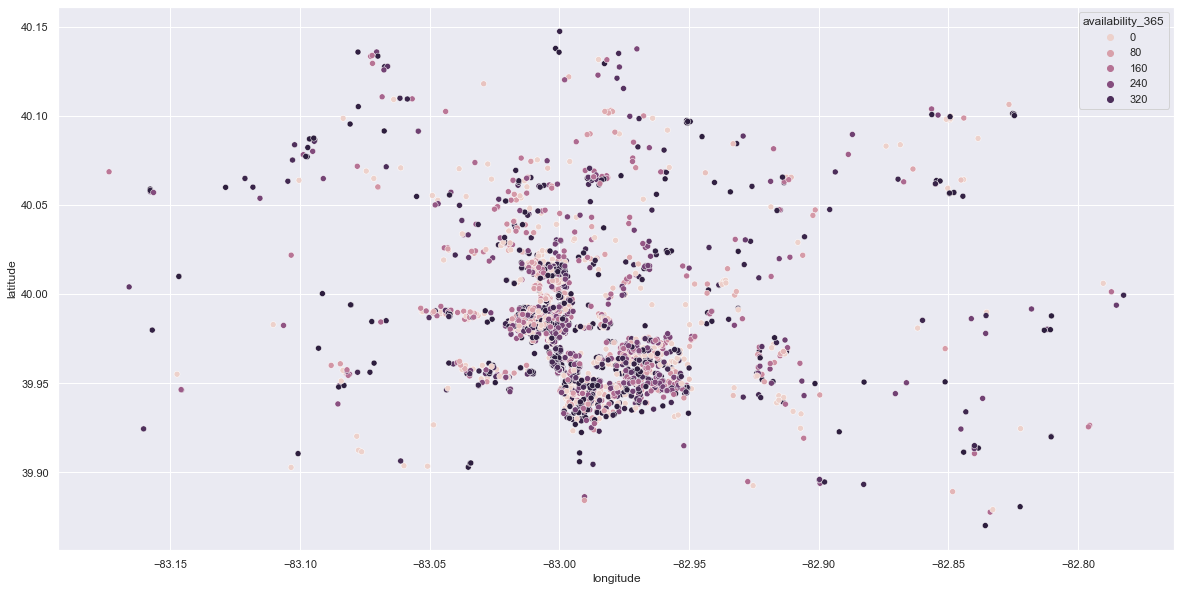

In [20]:
#Rooms availability.
plt.figure(figsize=(20,10))
sns.scatterplot(data.longitude,data.latitude,hue=data.availability_365)
plt.ioff()

**This map could help customers to choose Home/room based on availability.**

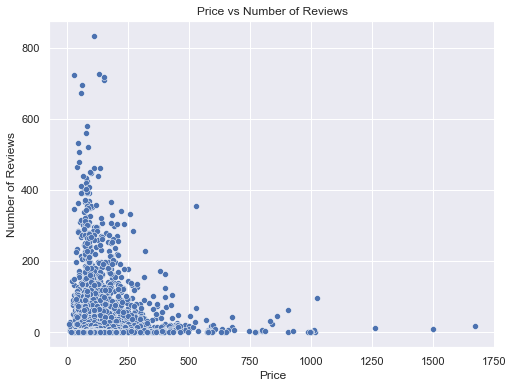

In [21]:
# Scatter plot of 'price' vs 'number_of_reviews'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=data)
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

**Here from scatter plot we can see how Price and Number of reviews correlation, and we can say that prices(listings) less than 150USD having more reviews.**

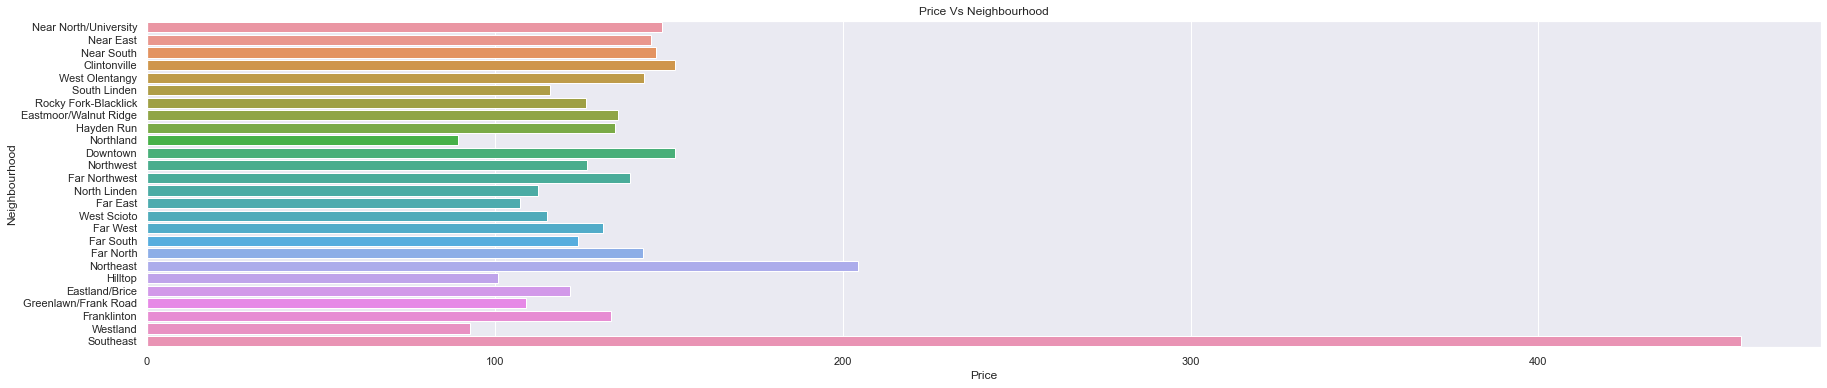

In [22]:
# Scatter plot of 'price' vs 'neighbourhood'
plt.figure(figsize=(30, 6))
sns.barplot(x='price', y='neighbourhood', data=data, ci=None)
plt.title('Price Vs Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Neighbourhood')
plt.show()


**From this horizontal bar graph we can see the price difference between different neighbourhoods, also we can notice that Southeast neighbourhood is the most expensive, while Northland is the least expensive neighbourhood.**

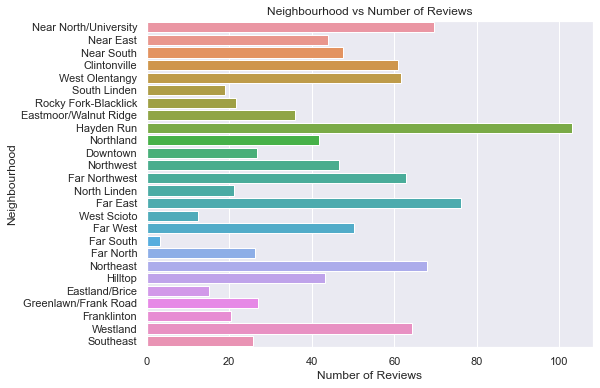

In [23]:
# Scatter plot of 'neighbourhood' vs 'number_of_reviews'
plt.figure(figsize=(8, 6))
sns.barplot(y='neighbourhood', x='number_of_reviews', data=data, ci=None)
plt.title('Neighbourhood vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Neighbourhood')
plt.show()

**Now we can see number of reviews based on different neighbourhood, Hayden Run neighbourhood has the most number of reviews followed by Far East then Near North/University, while Far South has the least number of reviews among all other neighbourhood.**

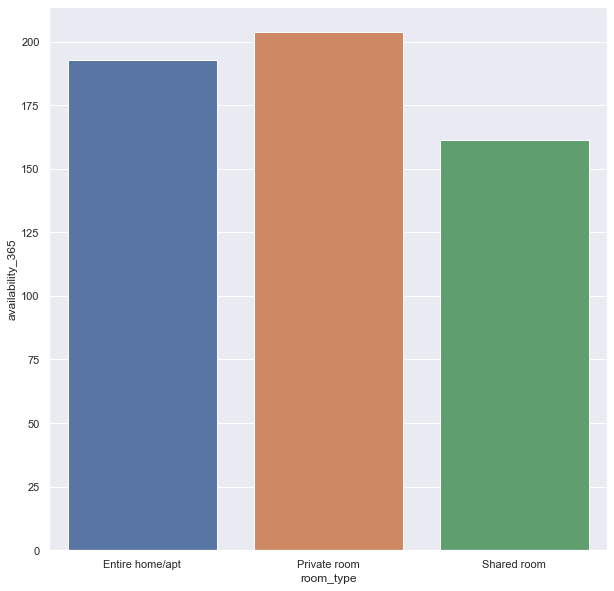

In [24]:
plt.figure(figsize=(10,10))
ax = sns.barplot(data=data, x='room_type',y='availability_365', ci=None)

**This graph representing home/room availability based on different type of rooms, but like we notice here there's no much difference between them based on that.**

**Feature engineering**

In [25]:
feature_columns=['neighbourhood','room_type','price','minimum_nights','calculated_host_listings_count','availability_365']

In [26]:
df=data[feature_columns]
df.head()

,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Near North/University,Entire home/apt,132.0,1,3,0
1,Near North/University,Private room,29.0,7,3,327
2,Near East,Private room,110.0,2,1,0
3,Near North/University,Shared room,30.0,1,8,349
4,Near North/University,Private room,73.0,1,8,336


**Encoding categorical variables**

In [27]:
df['room_type']=df['room_type'].factorize()[0]
df['neighbourhood']=df['neighbourhood'].factorize()[0]

<ipython-input-27-42e67f70d813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type']=df['room_type'].factorize()[0]
<ipython-input-27-42e67f70d813>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood']=df['neighbourhood'].factorize()[0]


In [28]:
df.head()

,neighbourhood,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,132.0,1,3,0
1,0,1,29.0,7,3,327
2,1,1,110.0,2,1,0
3,0,2,30.0,1,8,349
4,0,1,73.0,1,8,336


**Splitting our data Train/Test**

In [29]:
y = df['price']
x= df.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

**Modelling: Linear Regression.**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred_linreg=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

R-squared train score: 0.044
R-squared test score: 0.061


**Plotting the predicted values against the true values**


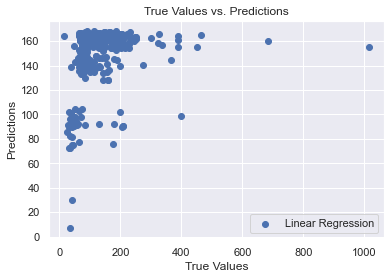

In [31]:
# Plotting the predicted values against the true values
plt.scatter(y_test, y_pred_linreg, label='Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions')
plt.legend()
plt.show()